In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [7]:
# "dropout", "seed"
change_name_dir = "seed"

#[]"wide", "detail"], "seed"
change_name = "seed"
with open(f'result/{change_name_dir}/CH_data_{change_name}_log.txt', 'r') as f:
    data = json.load(f)

data

{'42_train_mae': 0.1685311198234558,
 '42_train_rmse': 0.21916902803434984,
 '42_test_mae': 0.20866094529628754,
 '42_test_rmse': 0.268069908244287,
 '666_train_mae': 0.13180209696292877,
 '666_train_rmse': 0.1703426697458303,
 '666_test_mae': 0.17205677926540375,
 '666_test_rmse': 0.22672018778928044,
 '2023_train_mae': 0.11613217741250992,
 '2023_train_rmse': 0.14901746210440012,
 '2023_test_mae': 0.1645498424768448,
 '2023_test_rmse': 0.2205068002006872,
 '1_train_mae': 0.10031787306070328,
 '1_train_rmse': 0.1302965143745172,
 '1_test_mae': 0.15509477257728577,
 '1_test_rmse': 0.2089318450079159,
 '3_train_mae': 0.09427572041749954,
 '3_train_rmse': 0.12307130858624166,
 '3_test_mae': 0.151742085814476,
 '3_test_rmse': 0.20688783428625404}

In [8]:
if change_name == "wide":
    index = [0.0, 0.2, 0.4, 0.6, 0.8]
elif change_name == "detail":
    index = [0.3, 0.34, 0.38, 0.42, 0.46]
elif change_name == "seed":
    index = [42, 666, 2023, 1, 3]

columns = ['train_mae', 'train_rmse', 'test_mae', 'test_rmse']

data = {c: [data[f'{i}_{c.lower()}'] for i in index] for c in columns}
df = pd.DataFrame(data, index=index)

print(df)
#columnsとindexを入れ替える
df = df.T

      train_mae  train_rmse  test_mae  test_rmse
42     0.168531    0.219169  0.208661   0.268070
666    0.131802    0.170343  0.172057   0.226720
2023   0.116132    0.149017  0.164550   0.220507
1      0.100318    0.130297  0.155095   0.208932
3      0.094276    0.123071  0.151742   0.206888


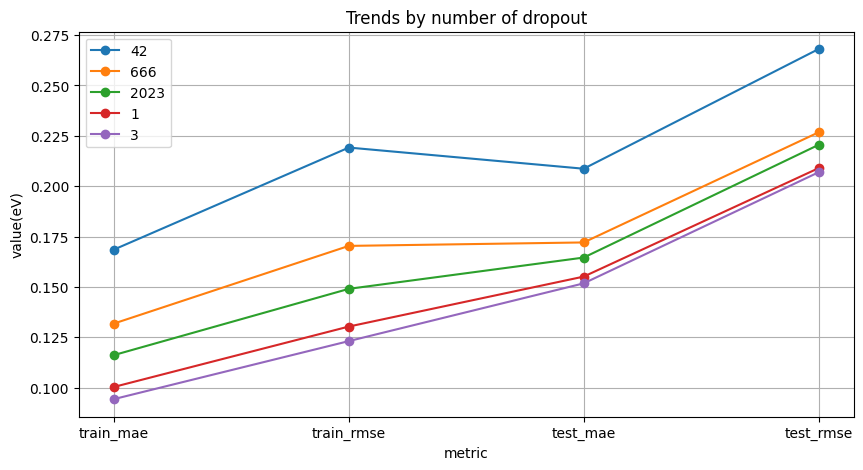

In [9]:
# グラフをプロットします
plt.figure(figsize=(10, 5))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)
plt.legend()
plt.xlabel('metric')
plt.ylabel('value(eV)')
plt.title('Trends by number of dropout')
plt.grid(True)
plt.savefig(f"resultplot/comparison_{change_name_dir}_{change_name}.png")
plt.show()
